# P5


In [1]:
import pandas as pd
import pickle

docs = pd.read_csv("QueryResults.csv")

In [2]:
docs.set_index('Id').sort_index()

,Title,Body,Tags,Score,ViewCount,FavoriteCount,AnswerCount
Id,,,,,,,
4,How to convert a Decimal to a Double in C#?,<p>I want to use a <code>Track-Bar</code> to c...,<c#><floating-point><type-conversion><double><...,759,64063,58,12
11,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...,1612,188799,552,41
13,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,673,248432,157,27
19,What is the fastest way to get the value of π?,<p>I'm looking for the fastest way to obtain t...,<performance><algorithm><language-agnostic><un...,341,63943,86,23
88,Is gettimeofday() guaranteed to be of microsec...,"<p>I am porting a game, that was originally wr...",<linux><winapi><visual-c++><unix><timer>,104,43767,19,10
...,...,...,...,...,...,...,...
69729326,Endless sine generation in C,<p>I am working on a project which incorporate...,<c><performance><time><precision><trigonometry>,91,10074,25,12
69832748,"Error ""Error: A <Route> is only ever to be use...",<p>I am trying to use routing for the first ti...,<javascript><node.js><reactjs><frameworks><rea...,57,77406,13,14
69875125,find_element_by_* commands are deprecated in s...,<p>When starting the function</p>\n<pre><code>...,<python><selenium><selenium-webdriver><webdriv...,52,59346,25,3


In [3]:
# one doc sample
docs.iloc[1]

Title            Starting point for learning CAD/CAE file formats?
Body             <p>We are developing some stress and strain an...
Tags                <c++><file-format><autocad><cad><solid-bodies>
Id                                                         1024323
Score                                                            6
ViewCount                                                     6097
FavoriteCount                                                   11
AnswerCount                                                      6
Name: 1, dtype: object

In [4]:
# one doc tags sample
docs['Tags'][0]

'<javascript><geolocation><projection><processing.js><proj4js>'

In [5]:
def tokenizeTags(tags):
    """
    Remove some unwanted characters
    """
    tags = tags.replace('<', ' ')
    tags = tags.replace('>', '')
    return tags.strip()

docs['Tags'] = docs['Tags'].apply(tokenizeTags)

In [6]:
# one doc tags sample
docs['Tags'][0]

'javascript geolocation projection processing.js proj4js'

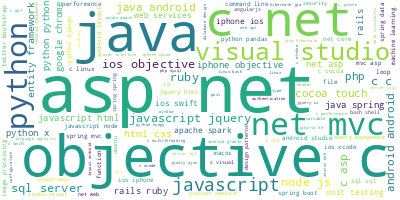

In [11]:
from wordcloud import WordCloud

long_string = ','.join(docs['Tags'])
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [7]:
# how to remove unwanted chars in the question body ?
import re

zero = docs.iloc[0]
re.sub('(<([^>]+)>)', '', zero.Body).replace('\n', '')


'I have this image. It\'s a map of the UK (not including Southern Ireland): I have successfully managed to get a latitude and longitude and plot it onto this map by taking the leftmost longitude and rightmost longitude of the UK and using them to work out where to put the point on the map.This is the code (for use in Processing.js but could be used as js or anything):// Size of the mapint width = 538;int height = 811;// X and Y boundariesfloat westLong = -8.166667;float eastLong = 1.762833;float northLat = 58.666667;float southLat = 49.95;void drawPoint(float latitude, float longitude){ fill(#000000); x = width * ((westLong-longitude)/(westLong-eastLong)); y = (height * ((northLat-latitude)/(northLat-southLat))); console.log(x + ", " + y); ellipseMode(RADIUS); ellipse(x, y, 2, 2);    }However, I haven\'t been able to implement a Mercator projection on these values. The plots are reasonably accurate but they are not good enough and this projection would solve it.I can\'t figure out how 

In [8]:
# todo wip : remove code snippets from the body
from bs4 import BeautifulSoup

# try using beautifulsoup
html_doc = docs['Body'].iloc[543].replace('&lt;', '<').replace('&gt;', '>')
print(html_doc)

soup = BeautifulSoup(html_doc, 'html.parser')
soup.find('div').decompose()
print('******************************************************')

print(soup.get_text())



<p>I'm trying to re-use a portion of my HTML view in multiple places.  The portion I want to re-use is table cells in an HTML table.  The problem is that my custom directive inside a ng-repeat is doing funny things.  I have reproduced the problem on <a href="http://jsfiddle.net/ravishi/BA4tQ/" rel="noreferrer">jsFiddle</a>.  There are two HTML tables in the jsFiddle.  The first is ng-repeat with the table cells written in the view and the second is the table cells coming from a directive, my-element.  Chrome dev tools report that the rendered HTML looks like this.  Note that the custom element appears only once and is outside the table.</p>

<p>Rendered HTML</p>

<pre><code><div ng-controller="MyCtrl" class="ng-scope">
    table1
    <table class="table table-hover">
      <tbody><!-- ngRepeat: p in people -->
          <tr ng-repeat="p in people" class="ng-scope">
            <td class="ng-binding">Name: Mike</td>
            <td class="ng-binding">Age: 20</td>
          </tr>
       

In [9]:
# words are the documents to use for the model
words = docs['Body'].to_list()

In [33]:
# remove stop words
# lemmatize (convert and remove prefixes and suffixes to ignore the gender, plural, verb : walking, walks, walked, walk -> walk)
# and/or stemmize (take the same root of words : universe / university -> univers)

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords.update(['p', 'gt', 'lt', 'li', 'ul', 'img', 'src', 'td', 'tr', 'table', 'div', 'code'])
filtre_stopw =  lambda text: [token.lower() for token in text if token.lower() not in stopwords]

from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import nltk
tokenizer = nltk.RegexpTokenizer(r'\w+')


# tokenize and remove stop words
def tokenize_sw_stem(doc):
	# nltk.word_tokenize(doc)
    filtered = filtre_stopw(tokenizer.tokenize(doc))
    ret = " ".join([stemmer.stem(s) for s in filtered] )
    return ret

def tokenize_sw_lem(doc):
    # nltk.word_tokenize(doc)
    filtered = filtre_stopw(tokenizer.tokenize(doc))
    ret = " ".join([lemmatizer.lemmatize(s) for s in filtered] )
    return ret


words_stem = list(map(tokenize_sw_stem, words))
words_lem = list(map(tokenize_sw_lem, words))
# words

In [37]:
words_stem[1]

'develop stress strain analysi softwar univ time move rectangl box sphere real model still littl idea start softwar go build mesh make calcul import solid bodi cad cae softwar 1 strong cad cae model organi strong solid bodi repr possibl dwg dxf ige step format e g complet dxf refer difficult understand without know basic concept 2 strong c librari import solid bodi cad cae file format strong difficult build complet model abl import comprehen file'

In [38]:
words_lem[1]

'develop stress strain analysi softwar univ time move rectangl box sphere real model still littl idea start softwar go build mesh make calcul import solid bodi cad cae softwar 1 strong cad cae model organi strong solid bodi repr possibl dwg dxf ige step format e g complet dxf refer difficult understand without know basic concept 2 strong c librari import solid bodi cad cae file format strong difficult build complet model abl import comprehen file'

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(words)
vectorizer.get_feature_names_out()
print(X.shape)
X = pd.DataFrame(X.T.todense())


(27128, 145886)


In [12]:
with open('vectorizer', 'wb') as v :
    pickle.dump(vectorizer, v)


In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import numpy as np

tf1_new = TfidfVectorizer(analyzer='word', ngram_range=(1,2), stop_words = "english", lowercase = True,
                          max_features = 5000, vocabulary = vectorizer.vocabulary_)
T = tf1_new.fit_transform(np.array(["configuring java for accessing database with jdbc is not working with JPA after upgrade of spring 5.1. despite having modified application.properties"]))
T = pd.DataFrame(T.T.todense())

In [14]:
# T
T[0].sort_values(ascending=False)

81635     0.447214
80689     0.447214
124627    0.447214
33497     0.447214
80961     0.447214
            ...   
48623     0.000000
48622     0.000000
48621     0.000000
48620     0.000000
145885    0.000000
Name: 0, Length: 145886, dtype: float64

In [15]:
# take the 3 most interesting keywords
indexes = T[0].sort_values(ascending=False)[:5]


In [16]:
print(indexes)
for i, val in indexes.items():
    # print(i)
    # print(indexes[0].index[i])
    if (val > 0): 
        print(vectorizer.get_feature_names_out()[i])

81635     0.447214
80689     0.447214
124627    0.447214
33497     0.447214
80961     0.447214
Name: 0, dtype: float64
jpa
java
spring
application
jdbc


In [17]:
# random index for testing
doc_n = 543
print(words[doc_n])
sorted = X[doc_n].sort_values(ascending=False)[:15]
print(sorted)
print(vectorizer.get_feature_names_out()[sorted.index[0]]) #take the higher tf-idf value in the list, and get its corresponding word
print(vectorizer.get_feature_names_out()[sorted.index[1]]) 
print(vectorizer.get_feature_names_out()[sorted.index[3]]) 

tri use portion html view multipl place portion want use cell html problem custom direct insid ng repeat funni thing reproduc problem href http jsfiddl net ravishi ba4tq rel noreferr jsfiddl two html tabl jsfiddl first ng repeat cell written view second cell come direct element chrome dev tool report render html look like note custom element appear outsid render html pre ng control myctrl class ng scope table1 class hover tbodi ngrepeat peopl ng repeat peopl class ng scope class ng bind name mike class ng bind age 20 ng repeat peopl class ng scope class ng bind name peter class ng bind age 22 tbodi br table2 element class ng bind name age element class hover tbodi ngrepeat peopl ng repeat peopl class ng scope ng repeat peopl class ng scope tbodi pre sourc html pre ng control myctrl table1 class hover ng repeat peopl name name age age br table2 class hover ng repeat peopl element element pre sourc js pre var app angular modul myapp app direct myelement function return restrict e templat

In [17]:
# snippet taken from sample notebook
import gensim
import multiprocessing

w2v_window=5
w2v_epochs=100
maxlen = 24 # adapt to length of sentences

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=5, window=w2v_window,
                                                vector_size=300,
                                                seed=42,
                                                # workers=30)
                                               workers=multiprocessing.cpu_count())
w2v_model.build_vocab(words)
w2v_model.train(words, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")


Build & train Word2Vec model ...
Vocabulary size: 290
Word2Vec trained


In [18]:
with open('w2v_model', 'wb') as v :
    # pickle.dump(w2v_model, v)
    w2v_model.save(v)


In [19]:
# word2vect docs and tutorial at https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py
for index, word in enumerate(w2v_words):
    if index == 10:
        break
    print(f"word #{index}/{len(w2v_words)} is {word}")

word #0/290 is  
word #1/290 is e
word #2/290 is t
word #3/290 is o
word #4/290 is a
word #5/290 is i
word #6/290 is n
word #7/290 is r
word #8/290 is s
word #9/290 is l


<https://vitalflux.com/text-classification-bag-of-words-model-python-sklearn/>

In [18]:
import numpy as np
 
vectorizer = CountVectorizer()
#
# Create sample set of documents
#
d = np.array(['Mirabai has won a silver medal in weight lifting in Tokyo olympics 2021',
                 'Sindhu has won a bronze medal in badminton in Tokyo olympics',
                 'Indian hockey team is in top four team in Tokyo olympics 2021 after 40 years'])
#
# Fit the bag-of-words model
#
bag = vectorizer.fit_transform(d)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer.get_feature_names())
#
# Associate the indices with each unique word
#
print(vectorizer.vocabulary_)
#
# Print the numerical feature vector
#
print(bag.toarray())


['2021', '40', 'after', 'badminton', 'bronze', 'four', 'has', 'hockey', 'in', 'indian', 'is', 'lifting', 'medal', 'mirabai', 'olympics', 'silver', 'sindhu', 'team', 'tokyo', 'top', 'weight', 'won', 'years']
{'mirabai': 13, 'has': 6, 'won': 21, 'silver': 15, 'medal': 12, 'in': 8, 'weight': 20, 'lifting': 11, 'tokyo': 18, 'olympics': 14, '2021': 0, 'sindhu': 16, 'bronze': 4, 'badminton': 3, 'indian': 9, 'hockey': 7, 'team': 17, 'is': 10, 'top': 19, 'four': 5, 'after': 2, '40': 1, 'years': 22}
[[1 0 0 0 0 0 1 0 2 0 0 1 1 1 1 1 0 0 1 0 1 1 0]
 [0 0 0 1 1 0 1 0 2 0 0 0 1 0 1 0 1 0 1 0 0 1 0]
 [1 1 1 0 0 1 0 1 2 1 1 0 0 0 1 0 0 2 1 1 0 0 1]]


/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
#
# Creating training data set from bag-of-words  and dummy label
#
X = bag.toarray()
y = np.array([1, 1, 0, 0, 1, 0, 0, 1])
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y)
#
# Create an instance of LogisticRegression classifier
#
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
#
# Fit the model
#
lr.fit(X_train, y_train)
#
# Create the predictions
#
y_predict = lr.predict(X_test)
  
# Use metrics.accuracy_score to measure the score
print("LogisticRegression Accuracy %.3f" %metrics.accuracy_score(y_test, y_predict))

ValueError: Found input variables with inconsistent numbers of samples: [3, 8]

In [ ]:
# sample 
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer().fit(docs['Body'])
# analyze = vectorizer.build_analyzer()
# analyze("This is a text document to analyze.")
# vectorizer.vocabulary_.get('wire')


# vectorizer.transform(['Something completely new.']).toarray()

# vectorizer.get_feature_names()


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# transformer = TfidfVectorizer()
# X = transformer.fit_transform(docs['Body'])

# transformer.get_feature_names_out()
# transformer.get_feature_names()

In [ ]:
# transformer.get_feature_names_out()